In [72]:
import pickle
import numpy as np

In [128]:
with open('embeddings_all.pkl', 'rb') as file:
    data = pickle.load(file)

x = data["outputs"].cpu().numpy()
y = data["labels"].cpu().numpy()
print(y.shape)

(49984,)


In [129]:
# normalize embeddings
x = (x - np.min(x)) / (np.max(x) - np.min(x))

In [130]:
embeddings = np.array(x)

In [131]:
# do PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
pca.fit(embeddings)

pca_transform = pca.transform(embeddings)

In [77]:
fine_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

print(len(fine_labels))

100


In [71]:
# compute the centroid for each class
centroids = []
labels = []
for i in range(100):
    centroids.append(np.mean(pca_transform[y == i], axis=0))
    labels.append(i)

print(len(centroids))
print(labels)

100
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [ ]:
t = np.array([[np.inf, 4,5,6], [4, np.inf, 3,2], [5,3,np.inf, 9], [6,2,9,np.inf]])


In [68]:
points = np.array([4,15,2,46,8,13,19,38], dtype=float)

points = np.sort(points)
print(points)

#exactly 4 clusters with 2 elements each

clusters = {}

for i in range(3):
    
    clusters[i] = points[(i*3):((i+1)*3)]

print(clusters)


[ 2.  4.  8. 13. 15. 19. 38. 46.]
{0: array([2., 4., 8.]), 1: array([13., 15., 19.]), 2: array([38., 46.])}


In [70]:
points = np.sort(centroids)
print(points.shape)
labels = np.argsort(centroids, axis=1)
print(labels.shape)

#exactly 4 clusters with 2 elements each

clusters = {}

for i in range(10):
    
    clusters[i] = points[(i*10):((i+1)*10)]

print(clusters)

(100, 100)
(100, 100)
{0: array([[-1.63263544e-01, -1.50546208e-01, -1.11120537e-01,
        -8.19955394e-02, -7.20575005e-02, -6.97387457e-02,
        -6.41910508e-02, -5.86710982e-02, -5.53301275e-02,
        -5.43607436e-02, -5.12473471e-02, -4.81897593e-02,
        -3.83702889e-02, -3.73661704e-02, -3.69587801e-02,
        -3.62704024e-02, -3.62157673e-02, -3.47918533e-02,
        -3.39978561e-02, -3.20873074e-02, -3.09108756e-02,
        -3.05391308e-02, -2.87468247e-02, -2.86073256e-02,
        -2.28267405e-02, -2.17967853e-02, -2.07599085e-02,
        -2.01024320e-02, -1.97860021e-02, -1.97457448e-02,
        -1.74670648e-02, -1.60428006e-02, -1.60104968e-02,
        -1.53229954e-02, -1.49356602e-02, -1.31464796e-02,
        -1.28193842e-02, -1.22568635e-02, -1.20340623e-02,
        -1.13503672e-02, -9.83671006e-03, -9.60785896e-03,
        -9.47987847e-03, -6.30247127e-03, -3.74033116e-03,
        -3.03675444e-03, -2.14063213e-03, -1.82158162e-03,
        -1.28645718e-03, -1.23

In [96]:

clusters = {}
parents = {}
curr_points = points.copy()
curr_labels = labels.copy()

for i in range(10):

    # calculate distances from the first centroid
    distances = np.linalg.norm(curr_points - curr_points[i], axis=1)

    # sort the distances and get the indices
    sorted_distances = np.argsort(distances)
    print("sorted", sorted_distances)

    # add to the cluster the 10 closest points but not itself
    clusters[i] = points[sorted_distances[:10]]
    #print(clusters[i])    
    parents[i] = (np.array(curr_labels)[sorted_distances])[:10]
    print(parents[i])

    # delete the points from the list
    curr_points = np.delete(curr_points, sorted_distances[:10], axis=0)
    curr_labels = np.delete(curr_labels, sorted_distances[:10], axis=0)

    # add the new point to the list
    #curr_points = np.vstack((curr_points, new_point_mean))
    print(curr_points.shape)



sorted [ 0 86 61 24 17  9 53 48 28 57 36 83 88 20 15 99 51  2 19 75 85 77 31 38
 84 91 41 39 94 78 69  1 16 34 89  7  8 58 70 60 66 22 97 42 18 64 44 43
 14 25 62 13 21 32  6 95 63 65 90 11 79 87 46 37 33 40 27 80 30  5 10 49
 35 82 98 92 55 54 81 26 56 73 29 23  3  4 76 67 45 50 71 72 68 12 93 74
 52 47 59 96]
[ 0 86 61 24 17  9 53 48 28 57]
(90, 100)
sorted [ 1  6 33 76 16 21 75 68 29 13 17 15 81 48 39 56 45  9 78 12 31 14 74 89
 66 26 87 53  0 79 70 34 69 55 38 84 19 27 60 37 61  2 57 80 52 63 71 54
 30 36 82 41 23  5 11 35 18 88 85  8  4 28 25 64 47 24  3  7 50 40 77 32
 44 83 10 73 22 58 43 72 20 49 65 67 62 51 46 42 86 59]
[ 2  7 38 85 19 25 84 77 34 15]
(80, 100)
sorted [ 2 19 63 18 77 28 47 10 65  1 62 72 69  0 31 16 56 58 14 20 34 73 24 78
 75  7 41 53 68 50 70  9 46  8 45 26 57 49 48 36 15 12 22 30 37 59 54 23
 32 21 66 64 38 74 52 40 13 55 29 27  4 71 67 25 79 42 60 61 17 51 43  3
 33 11 39 76 35 44  5  6]
[ 4 29 80 27 97 40 63 14 82  3]
(70, 100)
sorted [ 3 22 54 69 62 20  

In [97]:
print(parents)

{0: array([ 0, 86, 61, 24, 17,  9, 53, 48, 28, 57]), 1: array([ 2,  7, 38, 85, 19, 25, 84, 77, 34, 15]), 2: array([ 4, 29, 80, 27, 97, 40, 63, 14, 82,  3]), 3: array([ 8, 39, 78, 99, 91, 36, 16, 75, 26, 43]), 4: array([11, 35, 98,  1, 46, 62, 92, 21, 31, 54]), 5: array([18, 90, 13, 42, 37, 88, 33, 12, 51, 89]), 6: array([30, 95, 73, 23, 69, 60, 71, 83, 20, 49]), 7: array([45, 67, 10, 79,  5, 93, 50, 55, 44, 32]), 8: array([64, 22, 66, 65, 70,  6, 94, 87, 58, 72]), 9: array([96, 59, 47, 52, 81, 56, 76, 68, 41, 74])}


In [108]:
reverse = {}

for key in parents.keys():
    for i in range(len(parents[key])):
        reverse[parents[key][i]] = key

print(reverse)


{0: 0, 86: 0, 61: 0, 24: 0, 17: 0, 9: 0, 53: 0, 48: 0, 28: 0, 57: 0, 2: 1, 7: 1, 38: 1, 85: 1, 19: 1, 25: 1, 84: 1, 77: 1, 34: 1, 15: 1, 4: 2, 29: 2, 80: 2, 27: 2, 97: 2, 40: 2, 63: 2, 14: 2, 82: 2, 3: 2, 8: 3, 39: 3, 78: 3, 99: 3, 91: 3, 36: 3, 16: 3, 75: 3, 26: 3, 43: 3, 11: 4, 35: 4, 98: 4, 1: 4, 46: 4, 62: 4, 92: 4, 21: 4, 31: 4, 54: 4, 18: 5, 90: 5, 13: 5, 42: 5, 37: 5, 88: 5, 33: 5, 12: 5, 51: 5, 89: 5, 30: 6, 95: 6, 73: 6, 23: 6, 69: 6, 60: 6, 71: 6, 83: 6, 20: 6, 49: 6, 45: 7, 67: 7, 10: 7, 79: 7, 5: 7, 93: 7, 50: 7, 55: 7, 44: 7, 32: 7, 64: 8, 22: 8, 66: 8, 65: 8, 70: 8, 6: 8, 94: 8, 87: 8, 58: 8, 72: 8, 96: 9, 59: 9, 47: 9, 52: 9, 81: 9, 56: 9, 76: 9, 68: 9, 41: 9, 74: 9}


In [135]:
# for each embedding fint the closest centroid

a = np.zeros((10,100))


for i, x in enumerate(pca_transform):
    distances = np.linalg.norm(centroids - x, axis=1)
    first_index = np.argsort(distances)[0]
    print(first_index)    
    a[reverse[first_index]][y[i]] += 1

    

15
3
88
41
52
59
17
30
12
16
38
46
31
99
27
7
12
68
67
98
10
86
35
26
12
81
8
16
54
92
58
85
1
60
73
56
76
82
34
63
80
54
2
98
20
17
89
30
39
29
4
69
4
44
57
44
56
65
74
15
36
83
89
25
46
40
82
53
55
33
81
21
43
17
16
84
14
15
54
28
53
71
60
24
54
4
4
7
24
87
69
45
2
50
11
92
3
88
49
17
95
13
24
10
93
35
66
65
2
55
64
12
79
79
32
58
15
87
45
98
27
95
86
96
33
75
40
74
57
35
91
5
6
71
92
80
26
21
54
5
8
71
54
64
15
14
74
44
71
80
69
51
82
63
83
96
11
97
91
75
7
90
77
74
46
23
57
51
94
72
43
58
63
31
98
8
52
22
98
76
83
73
75
0
30
64
20
31
21
1
34
52
58
37
69
16
26
40
94
21
71
36
57
30
60
77
48
70
66
21
56
85
39
90
90
59
49
77
73
24
6
14
85
20
30
60
56
19
71
8
2
31
96
94
0
86
62
47
34
27
68
44
15
68
8
35
15
94
37
77
24
1
26
9
70
39
57
66
43
15
74
33
51
88
60
59
32
44
39
53
95
25
23
48
89
61
1
33
50
62
31
80
35
70
8
29
79
88
7
73
6
73
0
48
13
37
0
67
58
82
61
81
39
52
14
82
20
68
41
88
59
34
96
80
28
4
67
59
20
67
89
46
81
32
17
5
3
72
99
76
43
56
22
49
62
50
2
48
56
19
60
21
57
79
24
64


In [134]:
print(y.shape)
print(np.max(y))

(49984,)
99


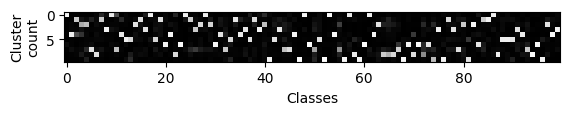

In [139]:

import matplotlib.pyplot as plt

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
#plt.title("Embedding count that belongs to a cluster for every label class number of clustering = " + str(centroids.shape[0]))
plt.imshow(a,cmap='Greys_r')

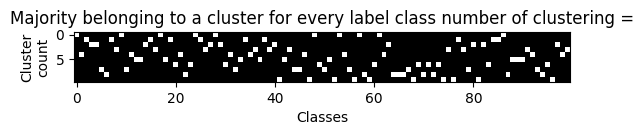

In [142]:
## majority voting for each class
b = np.argmax(a, axis=0)

c = np.zeros((10,100))
for x in range(100):    
    c[b[x]][x] = 1

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
plt.title("Majority belonging to a cluster for every label class number of clustering =")
plt.imshow(c, cmap='Greys_r')

In [143]:
np.sum(c, axis=1)

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.])